<a href="https://colab.research.google.com/github/rn-byte/Salary_prediction/blob/main/Expo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**So Guys We have Selected SALARY_PREDICTION dataset For The EXPO. From that dataset we need to find the pattern ,trend and make prediction.**

**The Salary Dataset contains four column :**
 **a.YearsExperience**
 **b. EducationLevel**
 **c. Age**
 **d. Salary**
**and 200 rows**

**1. First lets install and import necessary libraries**
<!--
**Lets Install Streamlit:**

**Streamlit is an open-source Python library that makes it easy to create and share custom web apps for machine learning and data science. By using Streamlit you can quickly build and deploy powerful data applications.** -->

In [37]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
print("Libraries Imported")

Libraries Imported


**2. Lets Load and Read the Data Set i.e  [salary_prediction.csv](https://drive.google.com/file/d/1mslWg8xmZYrk5gqFpWaOLtYVxuG_3W5N/view)**

In [38]:
#Loading and Reading CSV File
df=pd.read_csv('/content/salary_prediction.csv')
print('Data Set Loaded')

Data Set Loaded


In [39]:
#checking the whole data
df

,YearsExperience,EducationLevel,Age,Salary
0,7.5,4,51,54313.592802
1,19.0,4,49,82663.845282
2,14.6,3,54,72196.732571
3,12.0,1,59,60463.694565
4,3.1,4,35,35756.199258
...,...,...,...,...
195,7.0,4,32,48672.104217
196,14.5,1,47,59588.013310
197,17.9,3,39,74440.615169
198,17.7,4,47,80061.968880


**Displaying First and Last 10 Data**

In [4]:
#Displaing/ printing First 10 Data
df.head(10)

,YearsExperience,EducationLevel,Age,Salary
0,7.5,4,51,54313.592802
1,19.0,4,49,82663.845282
2,14.6,3,54,72196.732571
3,12.0,1,59,60463.694565
4,3.1,4,35,35756.199258
5,3.1,4,32,37708.558610
6,1.2,2,49,26850.719959
7,17.3,4,38,77493.897641
8,12.0,4,36,64320.462409
9,14.2,2,38,60262.962004


**Displaying Last 10 Data**

In [5]:
#Displaying Last 10 Data
df.tail(10)

,YearsExperience,EducationLevel,Age,Salary
190,1.9,1,29,18355.729367
191,17.9,4,45,79680.074066
192,18.0,1,38,67032.948937
193,12.7,4,58,68921.613823
194,6.8,4,22,50638.910308
195,7.0,4,32,48672.104217
196,14.5,1,47,59588.013310
197,17.9,3,39,74440.615169
198,17.7,4,47,80061.968880
199,15.6,2,27,60037.209061


**2. Checking DataSet INFORMATION**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  200 non-null    float64
 1   EducationLevel   200 non-null    int64  
 2   Age              200 non-null    int64  
 3   Salary           190 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


**So the salary Column contains 10 null value.**

**3. Describing DataSet Information.**

In [40]:
df.describe()

,YearsExperience,EducationLevel,Age,Salary
count,200.000000,200.000000,200.000000,190.000000
mean,9.678000,2.555000,40.555000,53284.165839
std,5.896913,1.141706,11.376029,31801.194434
min,0.100000,1.000000,20.000000,6127.861706
25%,4.600000,2.000000,31.000000,32182.506476
50%,9.900000,2.500000,42.000000,50689.864885
75%,15.125000,4.000000,50.000000,66201.111163
max,19.700000,4.000000,59.000000,269683.212127


**This table provides descriptive statistics for four variables: YearsExperience, EducationLevel, Age, and Salary**

**Overview of the Described Data:**

**count**: This shows the number of observations for each variable. We have 200 observations for YearsExperience, EducationLevel, and Age, but only 190 for Salary. This suggests there are 10 missing values for Salary.

**mean:** This is the average value for each variable. For example, the average YearsExperience is 9.678 years, and the average Salary is approximately $53,284.

**std:** Standard deviation is a measure of uncertainty. A low standard deviation means that most of the numbers are close to the mean (average) value. A high standard deviation means that the values are spread out over a wider range.

**Specifics:**

**YearsExperience:** Ranges from 0.1 years to 19.7 years, with an average of 9.678 years.

**EducationLevel:** This appears to be a categorical variable represented numerically. Without more context, it's hard to say for sure what each level represents (e.g., 1 = High School, 2 = Bachelor's, etc.). However, we can see that the average is 2.555, and the values range from 1 to 4.

**Age:** Ranges from 20 to 59 years old, with an average age of 40.555 years.

**Salary:** Ranges from approximately $6,128$ to $269,683$, with an average of $53,284. The large range and high standard deviation suggest potential outliers or a skewed distribution.

**Quartiles:**

**The 25th, 50th (median), and 75th percentiles give us a sense of the distribution:**

**YearsExperience:** 25% of individuals have less than 4.6 years of experience, 50% have less than 9.9 years, and 75% have less than 15.125 years.

**Age:** 25% of individuals are younger than 31,

50% are younger than 42,

 and 75% are younger than 50.

**Salary:**

25% of individuals earn less than $32,182,

50% earn less than $50,690 and

75% earn less than $66,201.

**4. Checking The Shape of DATA Set.**

**It will show output like (row,column)**

In [41]:
#It will show output like (row,column)
df.shape

(200, 4)

**Checking for Null Values**

In [42]:
#Checking for Null Values
df.isnull().sum()

,0
YearsExperience,0
EducationLevel,0
Age,0
Salary,10


**The Salary column have 10 null value. Maybe we can drop those rows or impute them.But since the dataset isn't too big, dropping might lose valuable info, so perhaps we should predict missing salaries based on other features would be better.**

**Usings linear or polynomial interpolation to estimate missing values based on trends in the dataset.**

In [43]:
#Usings linear or polynomial interpolation to estimate missing values based on trends in the dataset.
df['Salary'] = df['Salary'].interpolate(method='linear')
print('Missng value of Salary Added!!')

Missng value of Salary Added!!


In [44]:
#Again Checking for Null Values
df.isnull().sum()

,0
YearsExperience,0
EducationLevel,0
Age,0
Salary,0


**Now Salary column have 0 null value**

**Again Checking DataSet INFORMATION**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  200 non-null    float64
 1   EducationLevel   200 non-null    int64  
 2   Age              200 non-null    int64  
 3   Salary           200 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


**Now you can see in salary column there is 200 no null value**

#Exploratory Data Analysis

:**Now we'll perform some exploratory data analysis (EDA). Lets look at the distributions of each variable. Histograms or box plots for numerical variables like YearsExperience, Age, Salary. For EducationLevel, since it's categorical (assuming 1-4), maybe a bar plot to see distribution.**

#Bar Plot

In [13]:
df

,YearsExperience,EducationLevel,Age,Salary
0,7.5,4,51,54313.592802
1,19.0,4,49,82663.845282
2,14.6,3,54,72196.732571
3,12.0,1,59,60463.694565
4,3.1,4,35,35756.199258
...,...,...,...,...
195,7.0,4,32,48672.104217
196,14.5,1,47,59588.013310
197,17.9,3,39,74440.615169
198,17.7,4,47,80061.968880


 **Categorizing Age into Intervals**

In [14]:
# Categorizing Age into Intervals
def categorize_age(age):
    if age < 25:
        return 'Under 25'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    else:
        return '55 and above'

df['AgeGroup'] = df['Age'].apply(categorize_age)
print('Age Categorized and added as AgeGroup')

Age Categorized and added as AgeGroup


**Lets see the Data Again.**

In [15]:
df

,YearsExperience,EducationLevel,Age,Salary,AgeGroup
0,7.5,4,51,54313.592802,45-54
1,19.0,4,49,82663.845282,45-54
2,14.6,3,54,72196.732571,45-54
3,12.0,1,59,60463.694565,55 and above
4,3.1,4,35,35756.199258,35-44
...,...,...,...,...,...
195,7.0,4,32,48672.104217,25-34
196,14.5,1,47,59588.013310,45-54
197,17.9,3,39,74440.615169,35-44
198,17.7,4,47,80061.968880,45-54


**Mapping EducationLevel numerical value to Education Level**

**Since Education level is given in Numerical Form lets map that into Real Education Degree form**

In [16]:
# MAPPING EDUCATION LEVEL
education_mapping = {
    1: "High School",
    2: "Bachelor's Degree",
    3: "Master's Degree",
    4: "PhD"
}
# Replace numeric values with corresponding education labels
df["EducationLevel"] = df["EducationLevel"].map(education_mapping)
#print('EDUCATION LEVEL MAPPED !')

**LETS ONCE AGAIN SEE THE DATA.**

In [45]:
df

,YearsExperience,EducationLevel,Age,Salary
0,7.5,4,51,54313.592802
1,19.0,4,49,82663.845282
2,14.6,3,54,72196.732571
3,12.0,1,59,60463.694565
4,3.1,4,35,35756.199258
...,...,...,...,...
195,7.0,4,32,48672.104217
196,14.5,1,47,59588.013310
197,17.9,3,39,74440.615169
198,17.7,4,47,80061.968880


**Bar plot fot "Age- Group vs Years of Experience"**

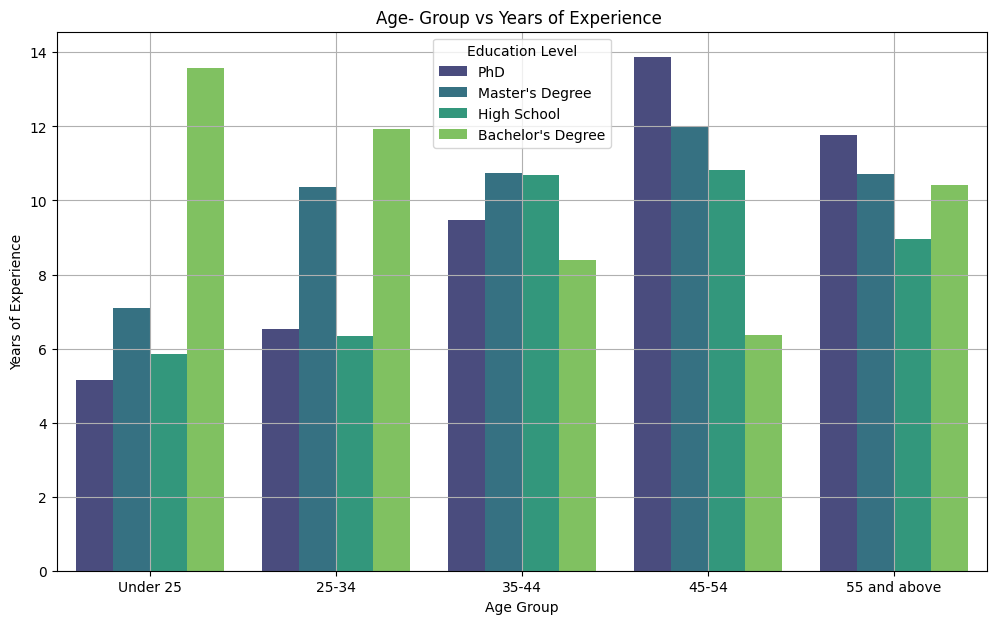

In [18]:
#Bar plot for "Age- Group vs Years of Experience"
age_order = ['Under 25', '25-34', '35-44', '45-54', '55 and above']
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=df, x='AgeGroup', y='YearsExperience',hue='EducationLevel',order=age_order, palette='viridis',errorbar=None)
ax.set_title('Age- Group vs Years of Experience ')
ax.set_xlabel("Age Group")
ax.set_ylabel("Years of Experience")
ax.grid(axis='both')
ax.legend(title='Education Level', loc='upper center')  # For moving the legend

Bar plot fot "Age- Group vs Salary"

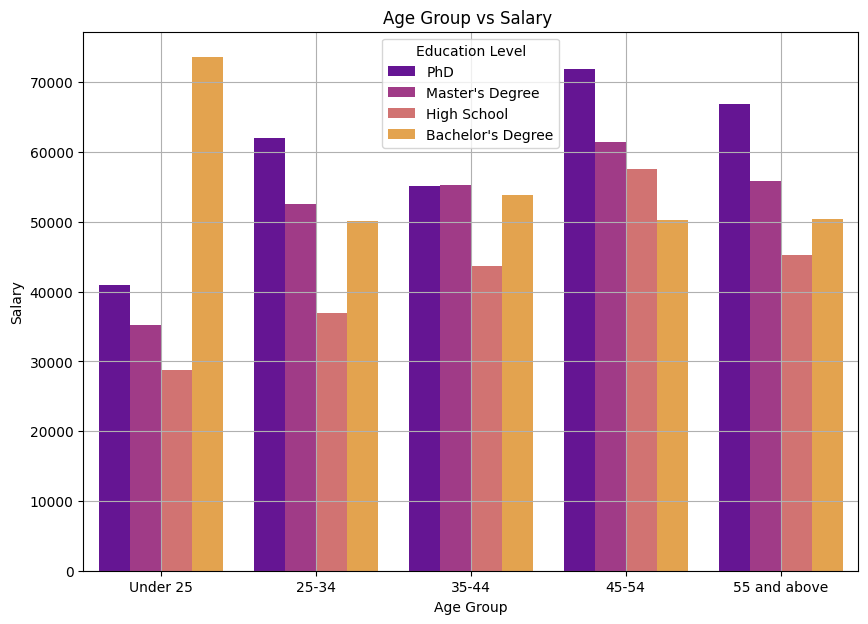

In [19]:
#Bar plot for "Age- Group vs Years of Experience"
age_order = ['Under 25', '25-34', '35-44', '45-54', '55 and above']
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=df, x='AgeGroup', y='Salary', hue='EducationLevel',order=age_order, palette='plasma',errorbar=None)
ax.set_xlabel("Age Group")
ax.set_ylabel("Salary")
ax.set_title('Age Group vs Salary ')
ax.grid(axis='both')
ax.legend(title='Education Level', loc='upper center')

**Bar plot fot "Salary Vs Experience"**

**For that Categorizing Years of Experience into Intervals too**

In [20]:
# Categorizing Years of Experience into Intervals
def categorize_experience(years):
    if years < 2:
        return '0-1 years'
    elif 2 <= years < 5:
        return '2-4 years'
    elif 5 <= years < 10:
        return '5-9 years'
    elif 10 <= years < 15:
        return '10-14 years'
    else:
        return '15+ years'

df['ExperienceGroup'] = df['YearsExperience'].apply(categorize_experience)


In [21]:
df

,YearsExperience,EducationLevel,Age,Salary,AgeGroup,ExperienceGroup
0,7.5,PhD,51,54313.592802,45-54,5-9 years
1,19.0,PhD,49,82663.845282,45-54,15+ years
2,14.6,Master's Degree,54,72196.732571,45-54,10-14 years
3,12.0,High School,59,60463.694565,55 and above,10-14 years
4,3.1,PhD,35,35756.199258,35-44,2-4 years
...,...,...,...,...,...,...
195,7.0,PhD,32,48672.104217,25-34,5-9 years
196,14.5,High School,47,59588.013310,45-54,10-14 years
197,17.9,Master's Degree,39,74440.615169,35-44,15+ years
198,17.7,PhD,47,80061.968880,45-54,15+ years


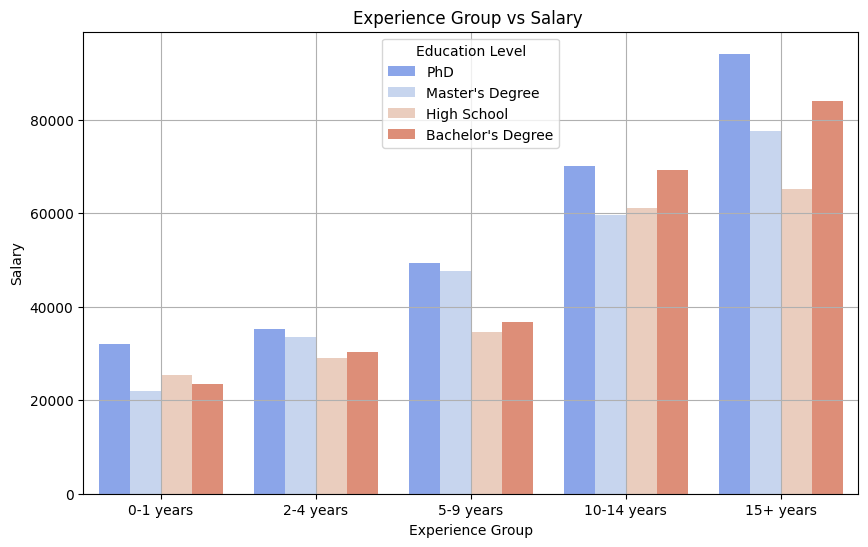

In [22]:
#Bar plot fot Bar plot for "Salary vs Years of Experience"
experience_order = ['0-1 years', '2-4 years', '5-9 years', '10-14 years', '15+ years']
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='ExperienceGroup', y='Salary', hue='EducationLevel', order=experience_order,palette='coolwarm',errorbar=None)
ax.set_xlabel("Experience Group")
ax.set_ylabel("Salary")
ax.set_title('Experience Group vs Salary ')
ax.grid(axis='both')
ax.legend(title='Education Level', loc='upper center')

#Histogram Plotting

**Categorizing Years of Experience into Intervals**

In [23]:
# # Create 6 equal-width bins automatically
# df['SalaryInterval'] = pd.cut(df['Salary'], bins=6)

# Categorizing Salary  into Intervals
def categorize_salary(Salary):
    if Salary < 10000:
        return '0-10K'
    elif 10000 <= Salary < 20000:
        return '10-20K'
    elif 20000 <= Salary < 30000:
        return '20-30K'
    elif 30000 <= Salary < 40000:
        return '30-40K'
    elif 40000 <= Salary < 50000:
        return '40-50K'
    elif 50000 <= Salary < 60000:
        return '50-60K'
    elif 60000 <= Salary < 70000:
        return '60-70K'
    else:
        return '70K + Salary'

df['SalaryGroup'] = df['Salary'].apply(categorize_salary)

In [24]:
df

,YearsExperience,EducationLevel,Age,Salary,AgeGroup,ExperienceGroup,SalaryGroup
0,7.5,PhD,51,54313.592802,45-54,5-9 years,50-60K
1,19.0,PhD,49,82663.845282,45-54,15+ years,70K + Salary
2,14.6,Master's Degree,54,72196.732571,45-54,10-14 years,70K + Salary
3,12.0,High School,59,60463.694565,55 and above,10-14 years,60-70K
4,3.1,PhD,35,35756.199258,35-44,2-4 years,30-40K
...,...,...,...,...,...,...,...
195,7.0,PhD,32,48672.104217,25-34,5-9 years,40-50K
196,14.5,High School,47,59588.013310,45-54,10-14 years,50-60K
197,17.9,Master's Degree,39,74440.615169,35-44,15+ years,70K + Salary
198,17.7,PhD,47,80061.968880,45-54,15+ years,70K + Salary


**Distribution of Salary by Education Level**

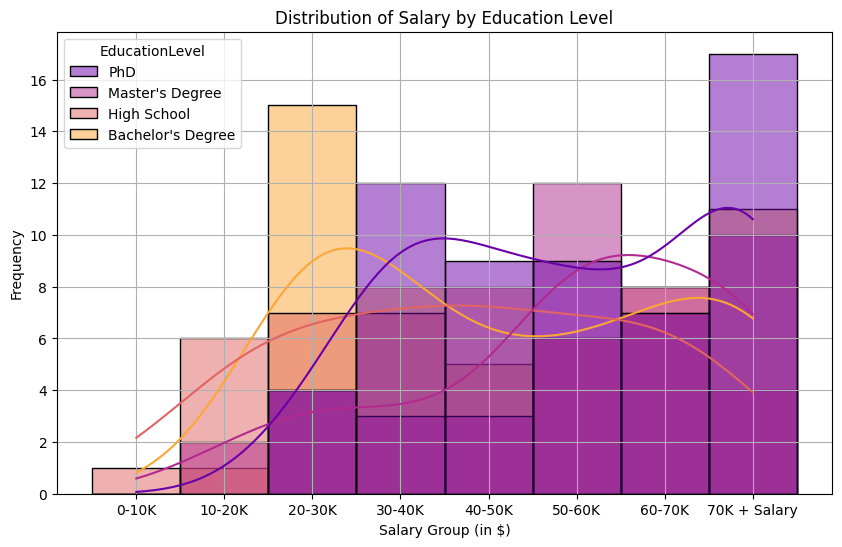

In [25]:
#Distribution of Salary by Education Level
salary_order = ['0-10K', '10-20K', '20-30K', '30-40K', '40-50K', '50-60K', '60-70K', '70K + Salary']

# Making sure the 'SalaryGroup' column is treated as a categorical variable with the specified order
df['SalaryGroup'] = pd.Categorical(df['SalaryGroup'], categories=salary_order, ordered=True)

# Plotting the histogram with kde
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SalaryGroup',hue="EducationLevel",palette='plasma', kde=True)
plt.title('Distribution of Salary by Education Level')
plt.xlabel('Salary Group (in $)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Distribution of Experience by Education Level**

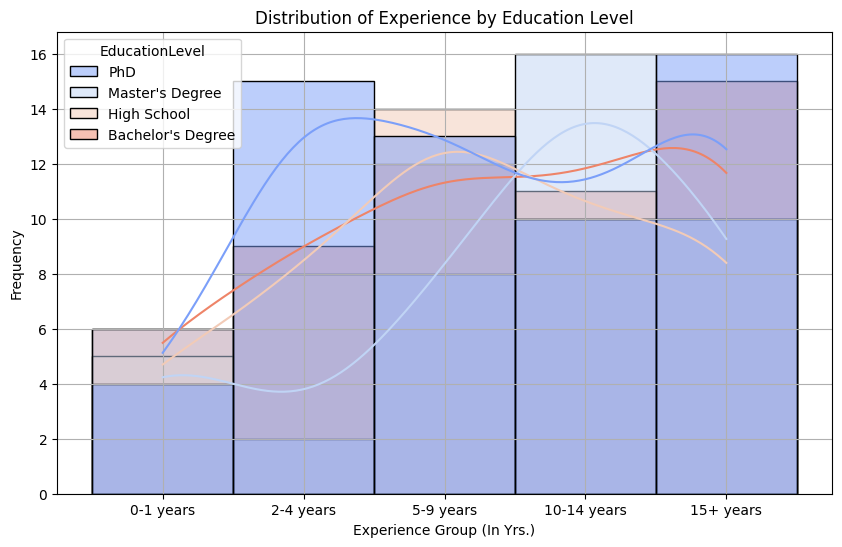

In [26]:
#Distribution of Experience by Education Level
experience_order = ['0-1 years', '2-4 years', '5-9 years', '10-14 years', '15+ years']
# Making sure the 'experience_order' column is treated as a categorical variable with the specified order
df['ExperienceGroup'] = pd.Categorical(df['ExperienceGroup'], categories=experience_order, ordered=True)

# Plotting the histogram with kde
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ExperienceGroup',hue="EducationLevel",palette='coolwarm', kde=True)
plt.title('Distribution of Experience by Education Level')
plt.xlabel('Experience Group (In Yrs.)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Distribution Education Level**

<ipython-input-27-6c4fa77f39e1>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="EducationLevel",palette='plasma',color='green', kde=True)


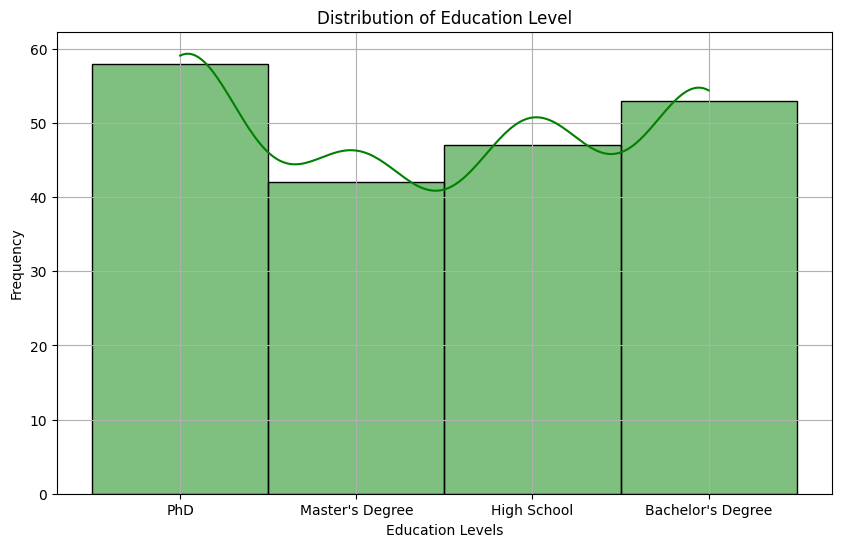

In [27]:
# Plotting the histogram with kde
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="EducationLevel",palette='plasma',color='green', kde=True)
plt.title('Distribution of Education Level')
plt.xlabel('Education Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Distribution Age Group by Education Level**

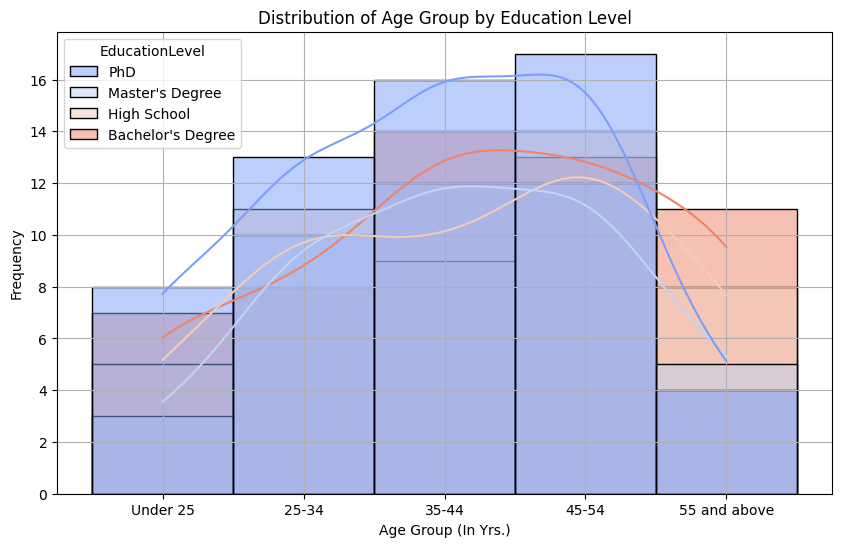

In [28]:
#Distribution of Age Group by Education Level
age_order = ['Under 25', '25-34', '35-44', '45-54', '55 and above']
# Making sure the 'experience_order' column is treated as a categorical variable with the specified order
df['AgeGroup'] = pd.Categorical(df['AgeGroup'], categories=age_order, ordered=True)

# Plotting the histogram with kde
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AgeGroup',hue="EducationLevel",palette='coolwarm', kde=True)
plt.title('Distribution of Age Group by Education Level')
plt.xlabel('Age Group (In Yrs.)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#Scatter Plot

**Scatter plot for Years of Experience vs Salary with Education Level**

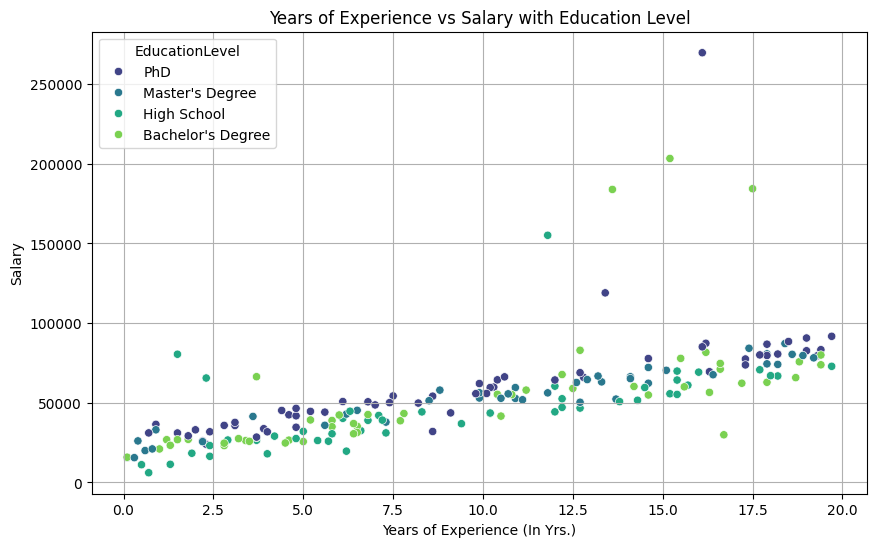

In [29]:
#**Scatter plot for Years of Experience vs Salary with Education Level**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='YearsExperience', y='Salary', hue='EducationLevel', palette='viridis')
ax.set_title('Years of Experience vs Salary')
plt.title('Years of Experience vs Salary with Education Level')
plt.xlabel('Years of Experience (In Yrs.)')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

**Scatter plot for Age vs Salary with Education Level**

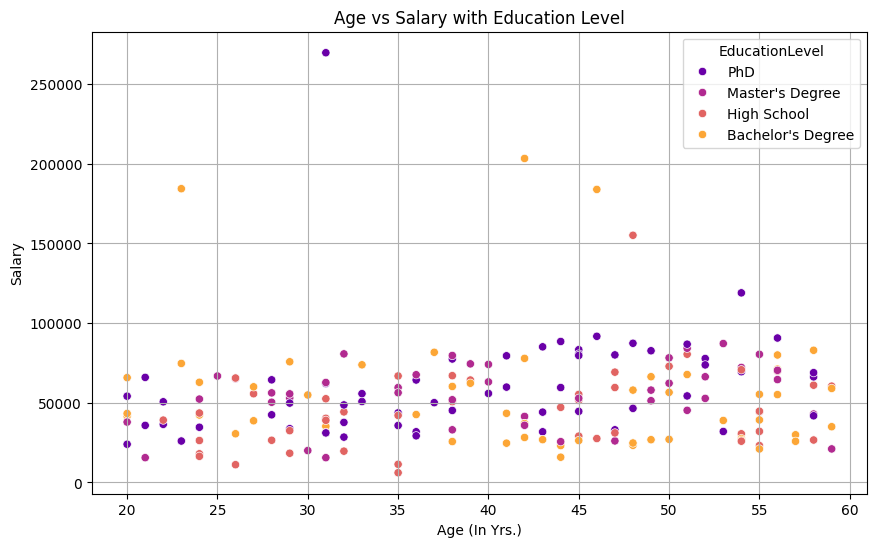

In [30]:
#**Scatter plot for Age vs Salary with Education Level**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='EducationLevel', palette='plasma')
ax.set_title('Age vs Salary with Education Level')
plt.title('Age vs Salary with Education Level')
plt.xlabel('Age (In Yrs.)')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

**Scatter plot for Age vs Experience with Education Level**

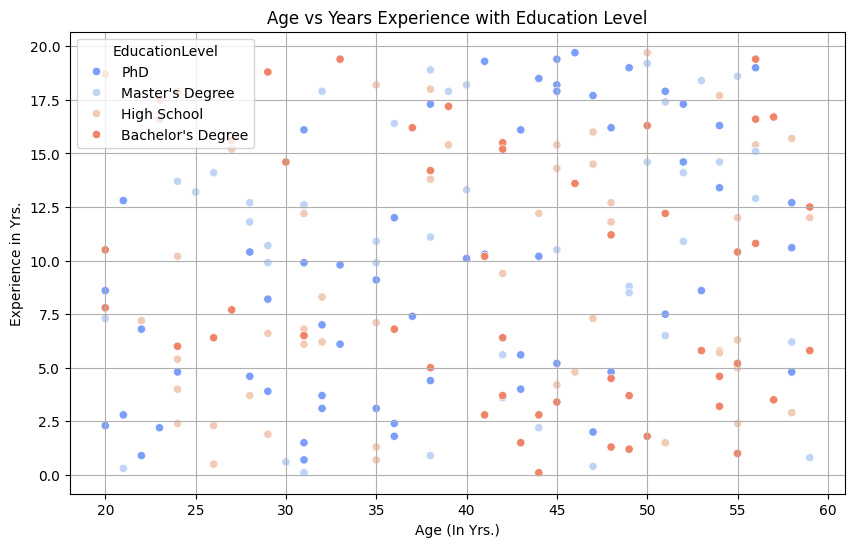

In [31]:
#Scatter plot for Age vs Experience with Education Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='YearsExperience', hue='EducationLevel', palette='coolwarm')
ax.set_title('Age vs Years Experience with Education Level')
plt.title('Age vs Years Experience with Education Level')
plt.xlabel('Age (In Yrs.)')
plt.ylabel('Experience in Yrs.')
plt.grid(True)
plt.show()

#Box Plot

**Box plot for Age Group vs Salary with Education Level**

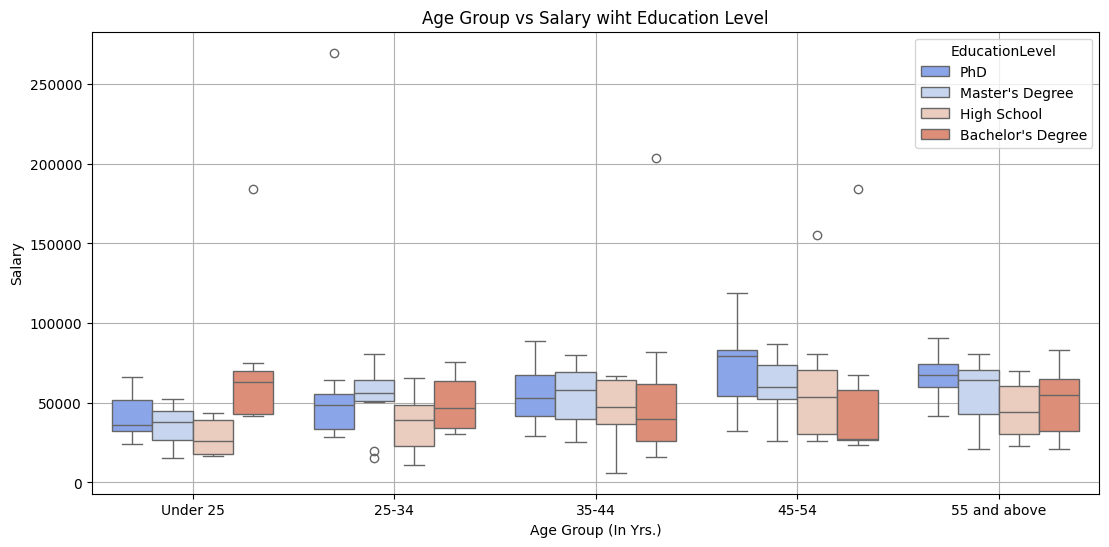

In [32]:
#Box plot for Age Group vs Salary with Education Level
plt.figure(figsize=(13, 6))
sns.boxplot(data=df, x='AgeGroup', y='Salary',hue='EducationLevel',palette='coolwarm')
ax.set_title('Age Group vs Salary wiht Education Level')
plt.title('Age Group vs Salary wiht Education Level')
plt.xlabel('Age Group (In Yrs.)')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

#Heat Map

Text(0.5, 1.0, 'Feature Correlation')

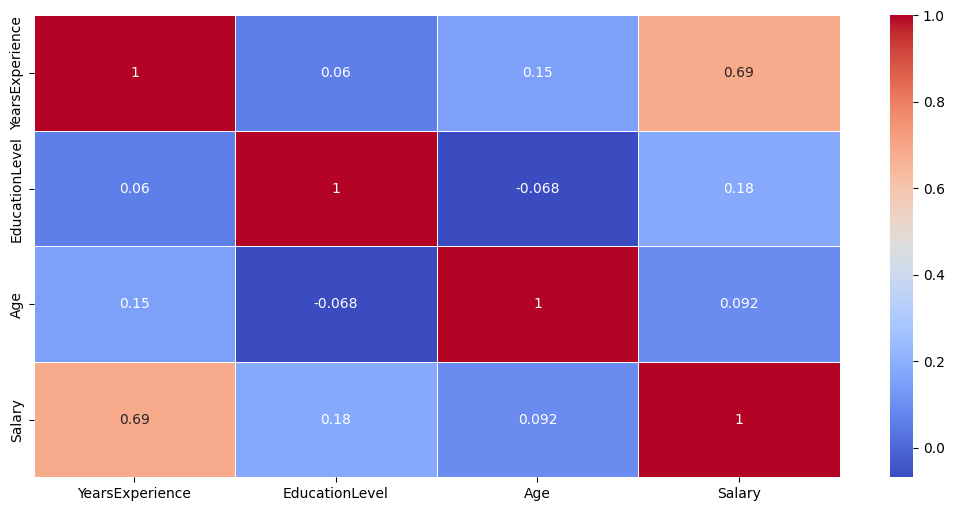

In [33]:
data=pd.read_csv('/content/salary_prediction.csv')
plt.figure(figsize=(13, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
ax.set_title('Feature Correlation')

#**Salary Prediction**

**We Splitted our data into training (80%) and testing (20%)**

**Trained a Linear Regression model and Random Forest Regressor model for prediction.**
**#Used features: Years of Experience, Education Level, Age.**

**#Goal: Predict Salary based on independent variables**


**---------------------------**

**Evaluated model performance using Mean Absolute Error (MAE) and R-squared.**

**Found relationships between experience and salary.**

**Higher education levels generally correlate with higher salaries.**

In [46]:
#Salary Predictions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

# Load the dataset
df = pd.read_csv('salary_prediction.csv')

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Prepare Features and Target
X = df[['YearsExperience', 'EducationLevel', 'Age']]
y = df['Salary']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Trying Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Trying Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Model Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Accuracy Calculation
rf_accuracy = rf_model.score(X_test, y_test)
poly_accuracy = poly_model.score(X_test_poly, y_test)

print('Salary Prediction Model Evaluation')
print(f'Random Forest - MAE: {mae_rf:.2f}, R-squared: {r2_rf:.2f}, Accuracy: {rf_accuracy:.2f}')
print(f'Polynomial Regression - MAE: {mae_poly:.2f}, R-squared: {r2_poly:.2f}, Accuracy: {poly_accuracy:.2f}')

# User Input for Salary Prediction
years_exp = float(input('Enter Years of Experience (IN Yrs.): '))
print(' 1: "High School",2: "Bachelor\'s Degree",3: "Master\'s Degree",4: "PhD"')
education_level = int(input('Enter Education Level (Choose from 1 to 4): '))
age = int(input('Enter Age: '))

input_data = pd.DataFrame([[years_exp, education_level, age]], columns=['YearsExperience', 'EducationLevel', 'Age'])
input_scaled = scaler.transform(input_data)
predicted_salary_rf = rf_model.predict(input_scaled)[0]
predicted_salary_poly = poly_model.predict(poly.transform(input_data))[0]

print(f'Predicted Salary (Random Forest): {predicted_salary_rf:.2f}')
print(f'Random Forest Model Performance (R² Score): {rf_accuracy:.2f}')
print(f'Predicted Salary (Polynomial Regression): {predicted_salary_poly:.2f}')
print(f'Polynomial Regression Model Performance (R² Score): {poly_accuracy:.2f}')




Salary Prediction Model Evaluation
Random Forest - MAE: 9687.74, R-squared: 0.42, Accuracy: 0.42
Polynomial Regression - MAE: 9132.31, R-squared: 0.49, Accuracy: 0.49
Enter Years of Experience (IN Yrs.): 10
 1: "High School",2: "Bachelor's Degree",3: "Master's Degree",4: "PhD"
Enter Education Level (Choose from 1 to 4): 4
Enter Age: 50
Predicted Salary (Random Forest): 60108.18
Random Forest Model Performance (R² Score): 0.42
Predicted Salary (Polynomial Regression): 58057.94
Polynomial Regression Model Performance (R² Score): 0.49
